# Food Sales Predictions
Hannah Ploutz

### Data Dictionary

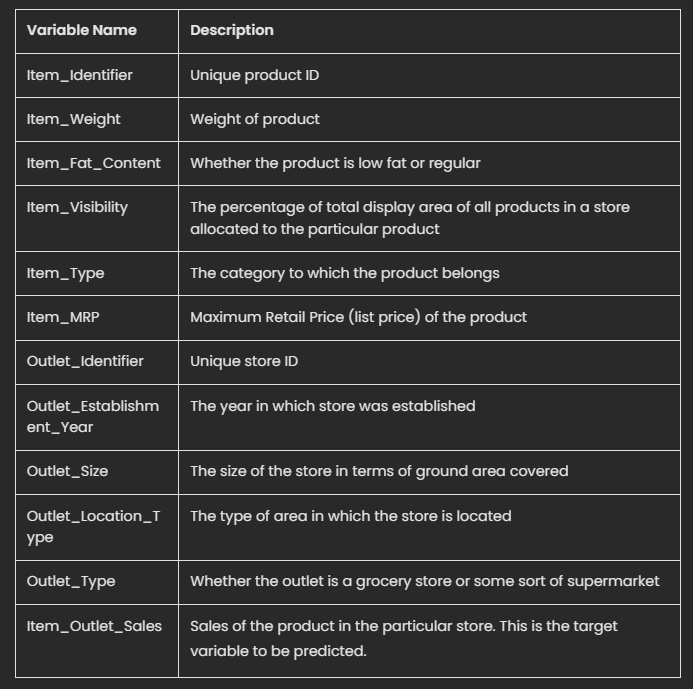

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

### Loading Data

In [2]:
filename = 'sales_predictions.csv'
df = pd.read_csv(filename)

### Function

Below is a function that will be used later to run regression metrics for the true and predicted values by printing MAE, MSE, RMSE and R2 metrics

In [3]:
## Create a function to take the true and predicted values
## and print MAE, MSE, RMSE, and R2 metrics

def model_metrics(pipe, X_train, y_train, X_test, y_test, 
                       model_name='Regression Model'):
  
  """Takes a regression model, training features and target and testing 
  features and target.
  Returns a dataframe of regression metrics"""

  ## Predictions
  train_pred = pipe.predict(X_train)
  test_pred = pipe.predict(X_test)
  
  metrics = ['train_MAE','test_MAE', 
             'train_RMSE', 'test_RMSE', 
             'train_R2', 'test_R2']
  
  ## Train
  train_mae = round(mean_absolute_error(y_train, train_pred),4)
  train_rmse = round(np.sqrt(mean_squared_error(y_train, train_pred)),4)
  train_r2 = round(r2_score(y_train, train_pred),4)

  ## Test
  test_mae = round(mean_absolute_error(y_test, test_pred),4)
  test_rmse = round(np.sqrt(mean_squared_error(y_test, test_pred)),4)
  test_r2 = round(r2_score(y_test, test_pred),4)

  ## Output Dataframe
  scores = pd.DataFrame(columns=metrics, index=[f'{model_name}'])
  scores.loc[f'{model_name}', :] = [train_mae, test_mae,
                                          train_rmse, test_rmse,
                                          train_r2, test_r2]

  return scores

  ---
## Data Cleaning

In [4]:
#View the data for the dataframe that was just loaded
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
#how many Rows and Columns in the data set
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')

There are 8523 rows, and 12 columns.


In [6]:
#Datatypes of each variable in the data set
data_types = df.dtypes
object_data_types = (data_types == "object").sum()
float_data_types = (data_types == "float").sum()
int_data_types = (data_types == "int").sum()

print(f'There are {object_data_types} object columns, {float_data_types} float columns, and {int_data_types} integer columns')

There are 7 object columns, 4 float columns, and 0 integer columns


In [7]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [8]:
#Checking the dataframe for duplicates
#There are no duplicate rows, no need to drop any duplicates
df.duplicated().sum()

0

In [9]:
#Print statement noting if there are any missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 3873 missing values.


**Address Missing Values**

In [10]:
#Looking at count of missing values by column
print(df.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [11]:
#% of missing values in each column
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


In [12]:
df[df.isna().any(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [13]:
#Gathering the counts of each unique item in the Outlet_Size column
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

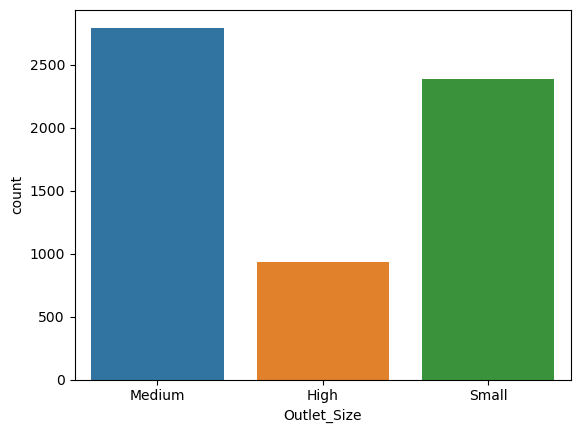

In [14]:
#Creating Visualization of the Outlet_Size column as a barchart using Seaborn
ax = sns.countplot(data = df, x = 'Outlet_Size');

I Decided to fill in the missing values in 'Outlet_Size' column with "Uknown" as there are a large amount of Medium and Small, and smaller amount of High.
<br>I don't want to make an assumption if its either "Medium" or "High" since both are fairly close to each other in number
<br>I also don't want to skew the data one way or another by adding a bias.

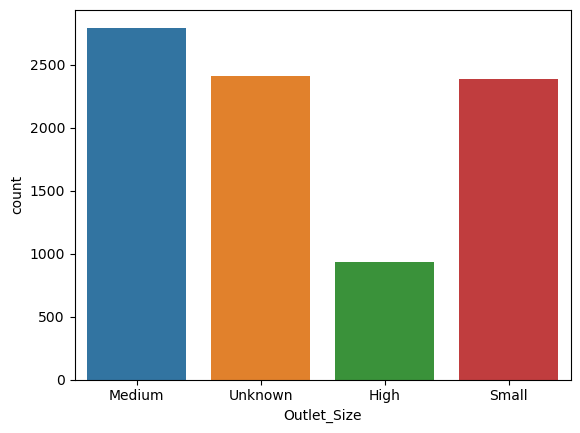

In [15]:
#Filling the missing value in the Outlet_Size column with "Unknown"
df['Outlet_Size'] = df['Outlet_Size'].fillna(value = 'Unknown')
ax = sns.countplot(data = df, x = 'Outlet_Size');

In [16]:
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64





Item_Weight column is missing around 17% of the values, I will use the following strategy:
<br>I don't want to remove the rows, there is a lot of good data in there and its > 5%
<br>Looking at the mean and median of the Item_Weight column, they are fairly close to each other (12.6 and 12.85)
<br>I will replace the missing values with the median value of the column, which is less affected by outliers than the "mean" strategy




In [17]:
#Find the median and mean weight of Item_weight
median_weight = df['Item_Weight'].median()
mean_weight = df['Item_Weight'].mean()
print(median_weight)
print(mean_weight)

12.6
12.857645184135976


In [18]:
#Fill the missing values with the median_weight
df['Item_Weight'] = df['Item_Weight'].fillna(median_weight)

In [19]:
#Final confirmation all missing values have been addressed
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

**Find and Fix inconsistent categories of data**

In [20]:
#Create variable that houses columns that are object types
object_data_types_filter = data_types[(data_types == "object")]
object_data_types_filter

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [21]:
object_data_types_filter.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [22]:
#For loop to loop through the index of the object columsn and display the unique values in each
for column in object_data_types_filter.index:
    print(column)
    print(df[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' 'Unknown' 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [23]:
#Fixing the inconsistent categorical values in the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat', 
                                                         'LF': 'Low Fat', 'reg': 'Regular'})

In [24]:
#Using same for loop again, checking to ensure changes were applied 
for column in object_data_types_filter.index:
    print(column)
    print(df[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' 'Unknown' 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In the next section I inspect the numerical columns and obtain the summary statistics of each (min, max, mean).



In [25]:
#Numerical statistics for all the numerical columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Exploratory Visuals

#### Histogram

*To view the distributions of various features in the dataset*

Below I used the Item_MRP column from the dataframe to create a histogram that looks at the distribution of the items maximum retail price. The y column 'Number of Products' is the total number of products that are bucketed at each of the Maximum Retail Price intervals.

Text(0, 0.5, 'Number of Products')

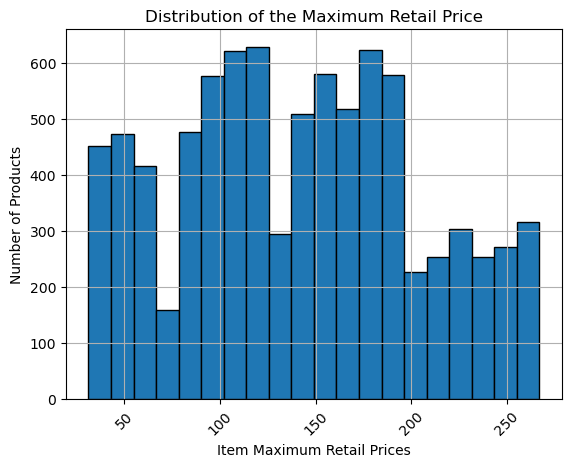

In [27]:
#Using .hist to create a histogram and adjust certain parameters
ax = df['Item_MRP'].hist(bins = 20, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Distribution of the Maximum Retail Price')
ax.set_xlabel('Item Maximum Retail Prices')
ax.set_ylabel('Number of Products')

Below I used the Item_Outlet_Sales column from the dataframe to create a histogram that looks at the distribution of the Sales of the products in the particular stores. The y column 'Number of Products in Sales Range' is the frequency of sales amounts that are bucketed at each of the sales intervals. 

Text(0, 0.5, 'Number of Products in Sales Range')

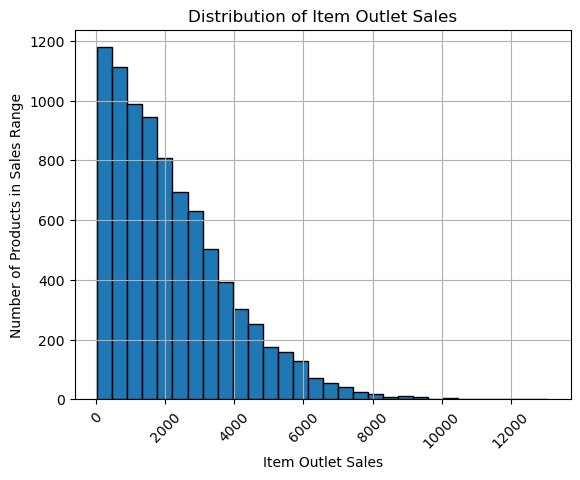

In [28]:
#Using .hist to create a histogram and adjust certain parameters
ax = df['Item_Outlet_Sales'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Distribution of Item Outlet Sales')
ax.set_xlabel('Item Outlet Sales')
ax.set_ylabel('Number of Products in Sales Range')

Below I used the Item_Weight column from the dataframe to create a histogram that looks at the distribution of the Item's Weight. The y column 'Number of Products' is the total number of products that are bucketed at each of the Item Weight intervals.

Text(0, 0.5, 'Number of Products')

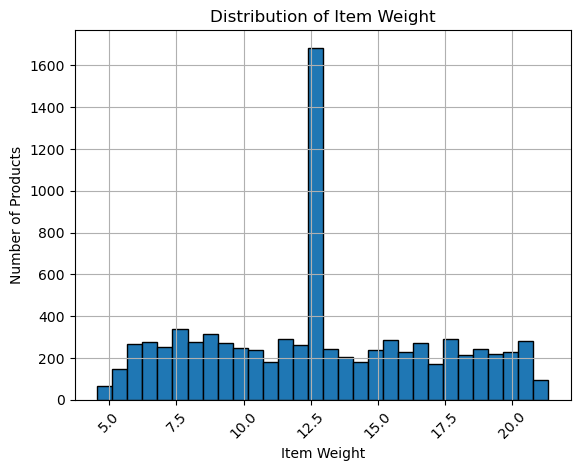

In [29]:
#Using .hist to create a histogram and adjust certain parameters
ax = df['Item_Weight'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Distribution of Item Weight')
ax.set_xlabel('Item Weight')
ax.set_ylabel('Number of Products')

Below I used the Outlet_Establishment_Year column from the dataframe to create a histogram that looks at the distribution of the years in which the Outlets were established. The y column 'Number of Products' is the total number of products that are bucketed at each of the Outlet Establishment's Year intervals.

Text(0, 0.5, 'Number of Outlets')

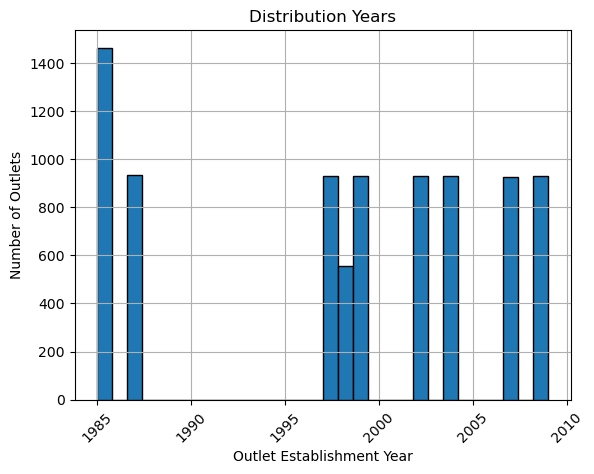

In [30]:
#Using .hist to create a histogram and then adjust certain parameters
ax = df['Outlet_Establishment_Year'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Distribution Years')
ax.set_xlabel('Outlet Establishment Year')
ax.set_ylabel('Number of Outlets')

Below I used the Item_visibility column from the dataframe to create a histogram that looks at the distribution of the percentage of total display area of all products in a store allocated to the particular product. The y column 'Count of Visibility Ranges' is the total count of those % that are bucketed at each of the % of Item Visbility Intervals.

Text(0, 0.5, 'Count of Visibilty Ranges')

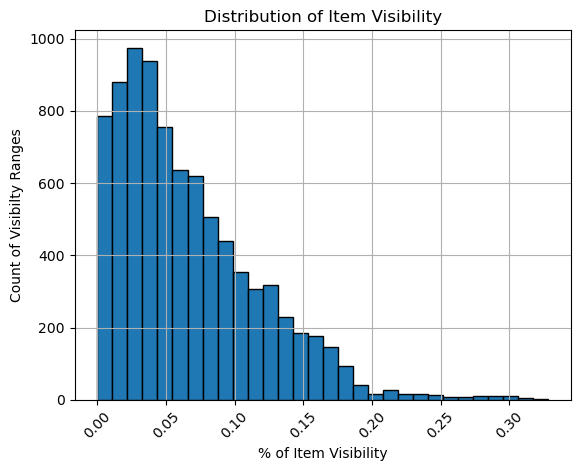

In [31]:
#Using .hist to create a histogram and adjust certain parameters
ax = df['Item_Visibility'].hist(bins = 30, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 45)
ax.set_title('Distribution of Item Visibility')
ax.set_xlabel('% of Item Visibility')
ax.set_ylabel('Count of Visibilty Ranges')

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### Boxplot

*To view statistical summaries of various features in the dataset*

Below I look at a boxplot where the x-axis is "Item Fat Content" and the y-axis is the "Item Weight" and I am wanting to compare the Item Fat Content next to the Item Weight. Low Fat and Regular are the two categories in the Item Fat Content column. There are no outliers in these two boxplots, and both low fat and regular have similar distribution of data with Lowfat having a slightly wider range of heavier and lighter products

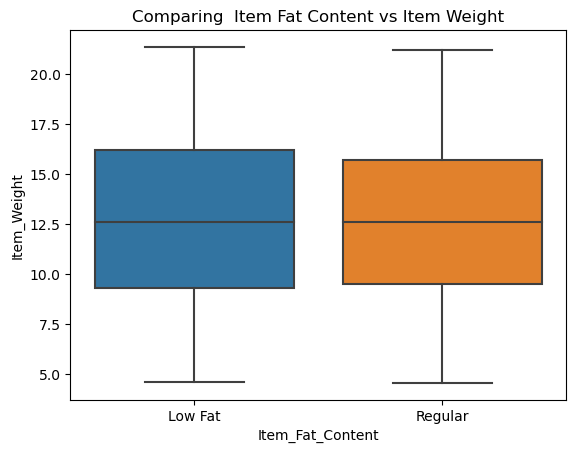

In [33]:
#Using Seaborn to create a boxplot
ax = sns.boxplot(x='Item_Fat_Content', y='Item_Weight', data=df)
ax.set_title("Comparing  Item Fat Content vs Item Weight");

Below I look at boxplots where the x-axis is "Outlet Type" and the y-axis is the "Item Visibilty" and I am wanting to compare the Outlet Type next to the Item Visibilty in the store. Supermarket Type1, Supermarket2, Supermarket3 and Grocery Store are the four categories in the Outlet Type column. There are some outliers in these boxplots, with some more extreme outliers in the Grocery Store boxplot. Supermarket 1,2 and 3 have a similar distribution of data while the Grocery store seems to have a higher degree of item visibilty of their products compared to the other types.

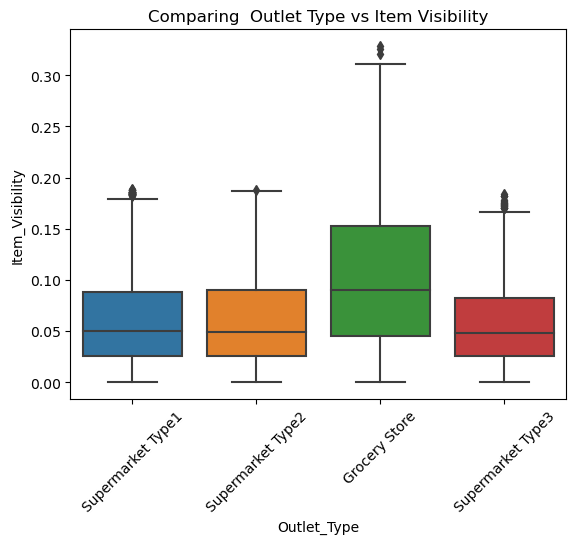

In [34]:
#Using Seaborn to create a boxplot
ax = sns.boxplot(x='Outlet_Type', y='Item_Visibility', data=df)
ax.set_title("Comparing  Outlet Type vs Item Visibility")
ax.tick_params(axis = 'x', rotation = 45);

Below I look at boxplots where the x-axis is "Item Type" and the y-axis is the "Item MRP" and I am wanting to compare the Item Types next to the Item MRP (Maximum Retail Price). There are 16 food type categories in the Item Type column. There are some outliers in the health and hygiene boxplot. Dairy seems to have a much wider distribution of its Item MRP with it being also one of the highest MRP prices.

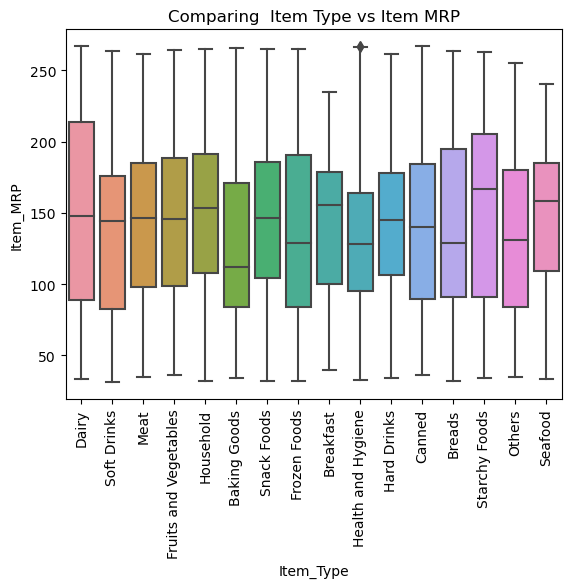

In [35]:
#Using Seaborn to create a boxplot
ax = sns.boxplot(x='Item_Type', y='Item_MRP', data=df)
ax.set_title("Comparing  Item Type vs Item MRP")
ax.tick_params(axis = 'x', rotation = 90);

#### Heatmap

*To view the correlations between features*

Below I create a heatmap of the data. I notice that Item_MRP has a positive moderate correlation with Item_Outlet_Sales. All other items have a low range of correlation. I also set the figsize to 12,10 to be closer to a square and the color to shades of blue.

C:\Users\hgplo\AppData\Local\Temp\ipykernel_728\2974083293.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


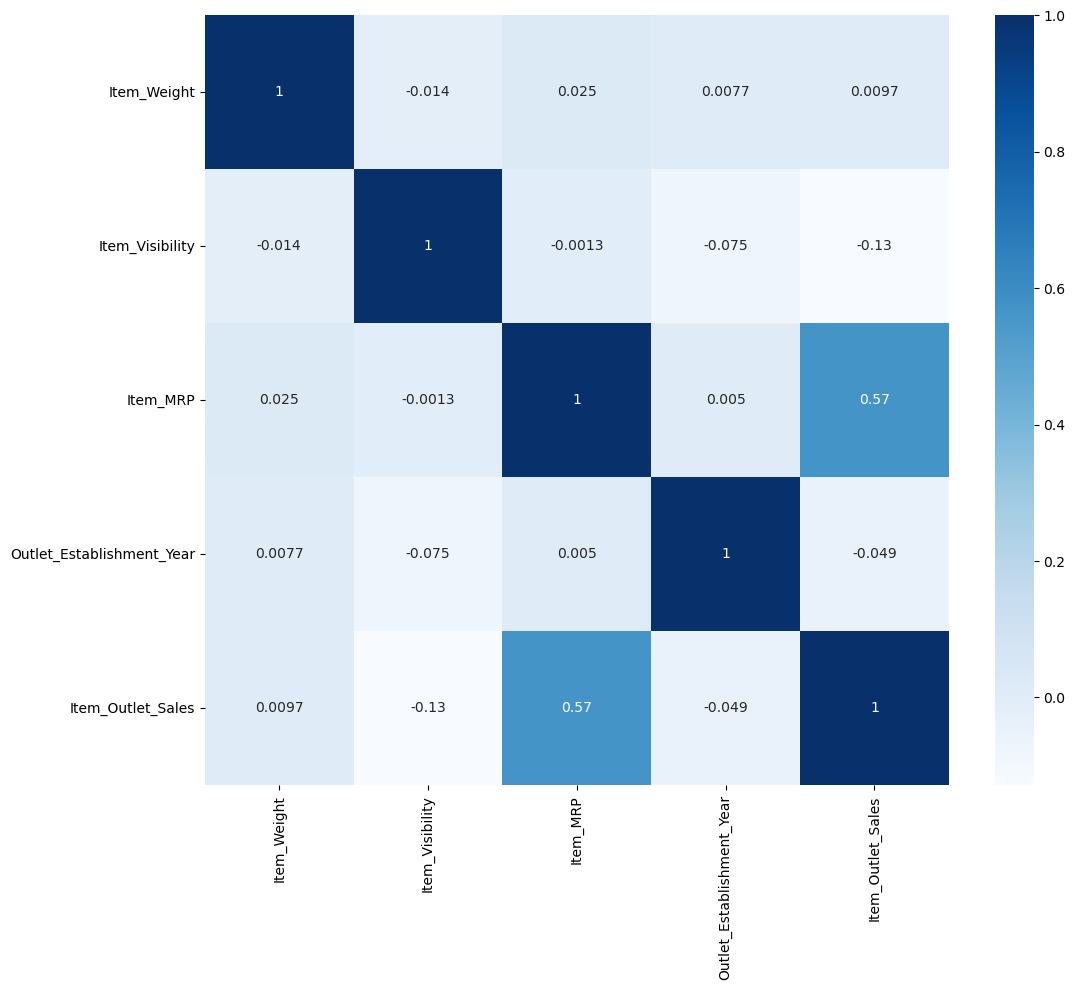

In [36]:
#df.corr to create a correlation of the numerical data, then creating a heatmap with Seaborn
corr = df.corr()
fig, ax = plt.subplots(figsize = (12, 10))
ax = sns.heatmap(corr, cmap= 'Blues', annot = True)

### Explanatory Visuals

*Questions to Answer*



1.   Which Outlet Type has the most and least amount of sales?
2.   What is the Distribution of Item Visibility?
3.   Which of the Item Types has the heaviest and lowest average weight?



I first begin by using df.head to take a look at my first 5 columns

In [37]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


*Which Outlet Type has the most and least amount of sales?*

In [38]:
#df.groupby to group it by Outlet Type and calculate the mean of the Item Outlet Sales for each Outlet Type. 
#Sort the values and assign it to the means variable
means = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().sort_values(ascending=False)
means

Outlet_Type
Supermarket Type3    3694.038558
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Grocery Store         339.828500
Name: Item_Outlet_Sales, dtype: float64

I then create a barchart using seaborn. I start with setting the figsize to 20,10, then I set the x axis to 'Outlet Type', y axis to 'Item Outlet Sales'. I then indicate order = means.index which then displays the bars on the x-axis in the order i created in the previous step for 'means'. After that I set the title 'Average Outlet Sales in USD vs. Outlet Type', the x label to 'Outlet Type' and the y label to 'Outlet Sales in USD'. Along the way I have adjusted the fontize and fonteight to my desired settings. I then create a new variable 'price_fmt' which then stores a string format which I will then apply to the y axis in the next step that follows. I want the y axis to have a comma as well as a $ sign

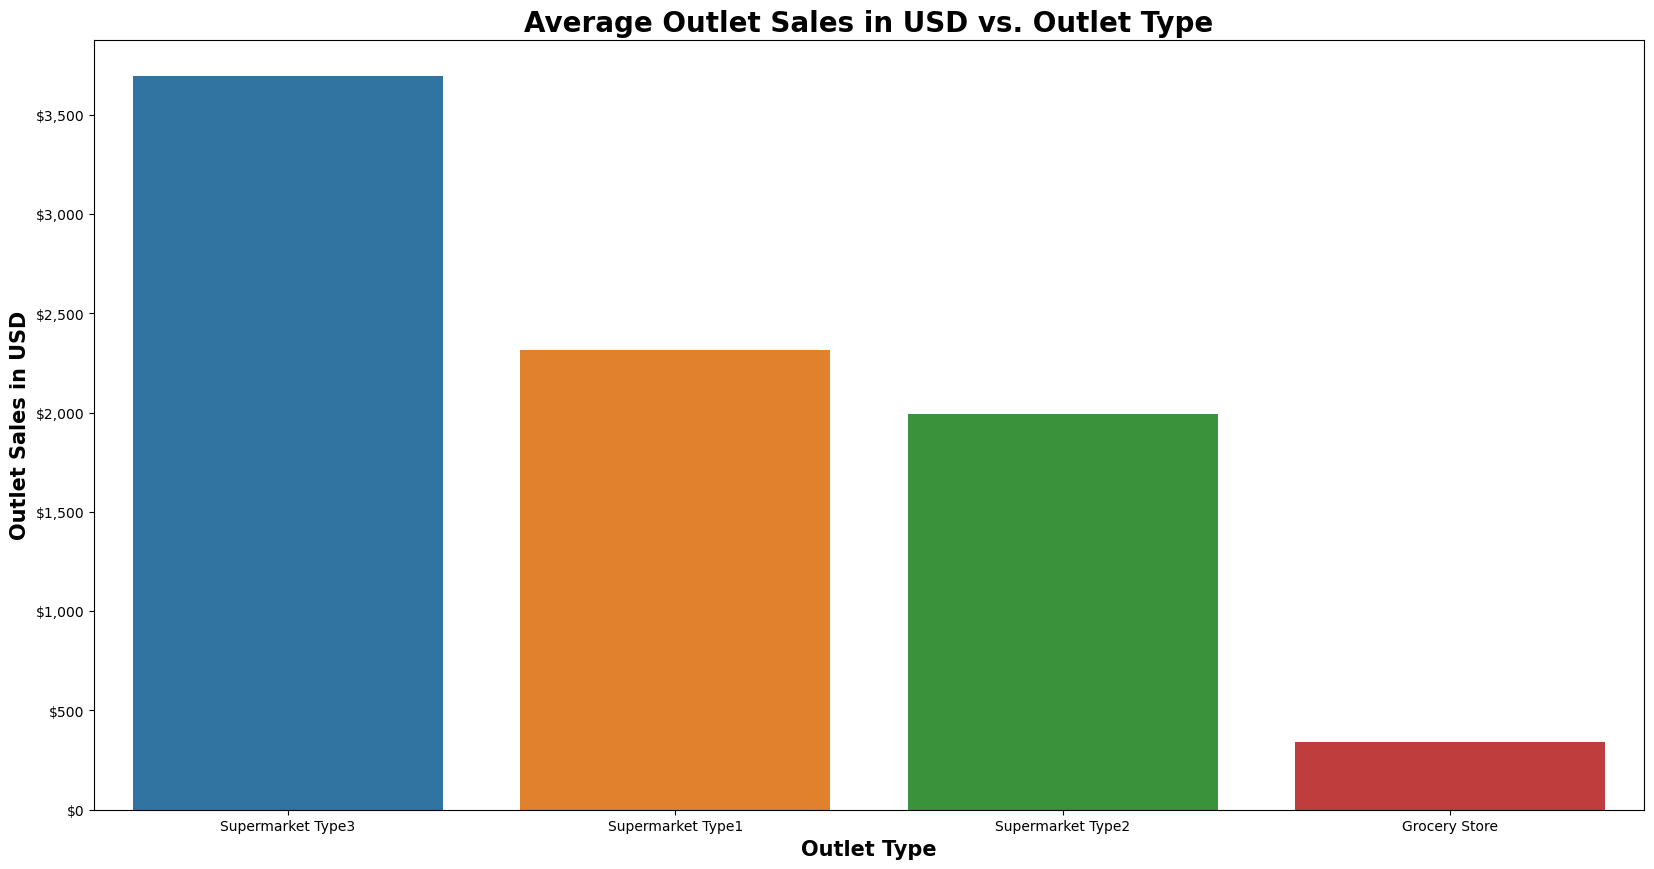

In [39]:
#Creating barchart using seaborn
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Outlet_Type', y = 'Item_Outlet_Sales', order = means.index, errorbar = None)
ax.set_title('Average Outlet Sales in USD vs. Outlet Type', fontsize = 20, fontweight = 'bold');
ax.set_xlabel('Outlet Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Outlet Sales in USD', fontsize = 15, fontweight = 'bold');

price_fmt = mpl.ticker.StrMethodFormatter('${x:,.0f}')
ax.yaxis.set_major_formatter(price_fmt)

The Outlet Type with the Most Sales: 


*   Supermarket Type3 with an average of over $3,500 in sales

The Outlet Type with the Least Sales:


*   Grocery Store with less then $500




*What is the distribution of Item Visibility?*

To answer this question I start out by creating a function called "plot_annotated_histogram". This function creates a histogram of a given column col in a pandas DataFrame df. This function starts with calculating the mean of the column, rounds it to 2 decimal places, and saves it as a variable mean. It then creates a histogram of the column using seaborn's histplot() function and adds a vertical line at the mean value using matplotlib's axvline() function. The function also sets a title for the plot and adds a legend to show the location of the mean line. Finally, the function returns the figure and axis objects

In [40]:
#Creating function for a histogram
def plot_annotated_histogram(df, col):
    ## Saving the mean of the column
    mean = df[col].mean().round(2)
    # Plotting the histogram + new col's mean
    fig,ax = plt.subplots(figsize=(10,6))
    sns.histplot(data=df, x=col, ax=ax)
    ax.axvline(mean, color='red',label=f'Mean {mean}');
    ax.set_title(col)
    ax.legend();
    return fig, ax

In this step I use the newly created function and give it the data as df, and the col = 'Item_Visibility'. This will create a histogram that shows that there are a greater count of lower visibility items, with the mean being 0.07.

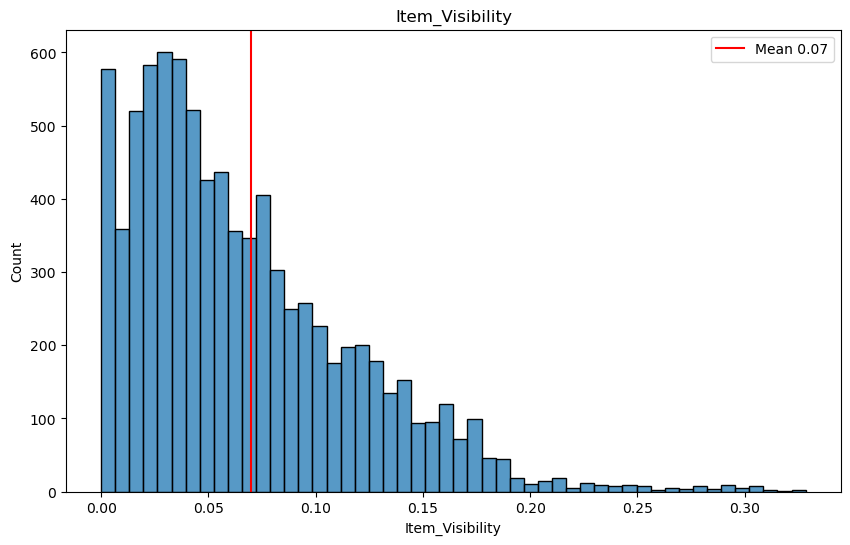

In [41]:
fig,ax = plot_annotated_histogram(df, col = 'Item_Visibility')

*Which of the Item Types has the heaviest and lowest average weight?*


In order to answer this question, I start by using df.groupby to group it by Item Type and calculate the mean of the Item Weight for each Item Type. I sort the values and assign it to the weight_means variable

In [42]:
#Use df.groupby to group it by Item Type and calculate the mean of the Item Weight for each Item Type.
weight_means = df.groupby('Item_Type')['Item_Weight'].mean().sort_values(ascending=False)
weight_means

Item_Type
Others                   13.615976
Starchy Foods            13.558074
Dairy                    13.285565
Household                13.254522
Fruits and Vegetables    13.116753
Health and Hygiene       13.048452
Snack Foods              12.919354
Frozen Foods             12.824007
Meat                     12.772341
Breakfast                12.736091
Seafood                  12.562422
Canned                   12.355586
Baking Goods             12.332917
Soft Drinks              11.967528
Breads                   11.581574
Hard Drinks              11.574112
Name: Item_Weight, dtype: float64

I then create a barchart using seaborn. I start with setting the figsize to 20,10, then I set the x axis to 'Item Type', y axis to 'Item Weight'. I then indicate order = weight_means.index which then displays the bars on the x-axis in the order i created in the previous step for 'weight_means'. After that I set the title 'Average Item Weight vs. Item Type', the x label to 'Item Type' and the y label to 'Item Weight'. Along the way I have adjusted the fontize and fonteight to my desired settings. I then create a new variable 'oz_fmt' which then stores a string format which I will then apply to the y axis in the next step that follows. I want the y axis to have oz after the number to indicate the weight

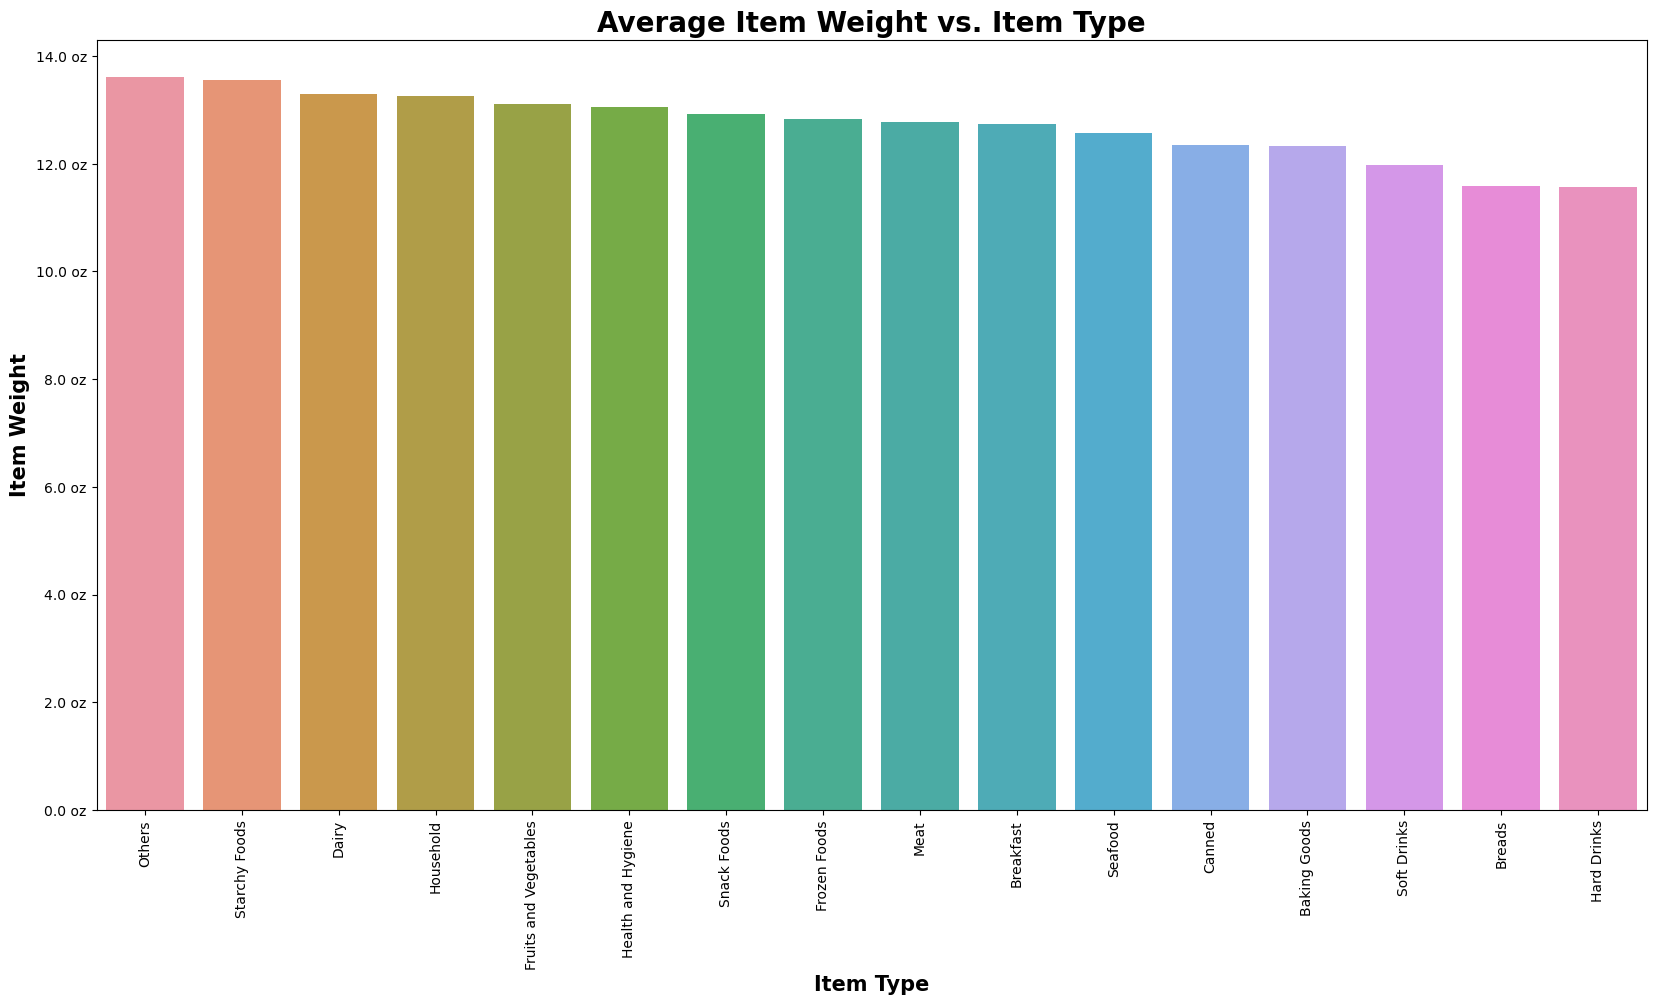

In [43]:
#Create barchart using seaborn
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot(data=df,x='Item_Type', y = 'Item_Weight', order = weight_means.index, errorbar = None)
ax.set_title('Average Item Weight vs. Item Type', fontsize = 20, fontweight = 'bold');
plt.xticks(rotation = 90)
ax.set_xlabel('Item Type', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('Item Weight', fontsize = 15, fontweight = 'bold');

oz_fmt = mpl.ticker.StrMethodFormatter('{x} oz')
ax.yaxis.set_major_formatter(oz_fmt)

This shows that Others and Starchy Foods have the highest weights, while Breads and Hard Drinks have the lowest average weights in this data set

  ---
## Prepare the Data for Machine Learning

### Imports

In [44]:
## Pandas
import pandas as pd

## Numpy
import numpy as np

## MatPlotLib
import matplotlib.pyplot as plt

## Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

## Models
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

## Regression Metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

## Set global scikit-learn configuration 
from sklearn import set_config
## Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

from IPython.core.display import clear_output

C:\Users\hgplo\AppData\Local\Temp\ipykernel_728\3219205116.py:32: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import clear_output


### Loading Data

In [45]:
filename_2 = 'sales_predictions.csv'
data = pd.read_csv(filename_2)

### Data Cleaning

**Dropping Duplicates**

I start by cleaning my data and dropping any duplicate rows using an if statement

In [46]:
# If statement where if there are 0 duplicate rows, print: "There are 0 duplicate rows, no need to delete any duplicate rows"
# Otherwise, if there are any duplicate's - drop them and output "x duplicate rows have been dropped". 

if data.duplicated().sum() == 0:
  print(f'There are {data.duplicated().sum()} duplicate rows, no need to delete any duplicate rows.')
else:
  data.drop_duplicates(inplace=True)
  print(f'{data.duplicated().sum()} duplicate rows have been dropped.')

There are 0 duplicate rows, no need to delete any duplicate rows.


**Identifying Missing Values**

Here I will only identify the missing values which will then be dealt with later on in this section - I note that the Item_Weight and Outlet_Size columns are both missing 17% and 28% of their data

In [47]:
# Print statement that identifies how many total missing values
print(f'There are {data.isna().sum().sum()} missing values.')

There are 3873 missing values.


In [48]:
# Print statement that displays the percentage of missing values from each column
print(data.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


**Fix Inconsistences in Categorical Data**

In this next section I will fix all the inconsistincies in the categorical data. I will adjust the Item_Fat_Content column so that has two clean strings "Low Fat" and "Regular"

In [49]:
# Create filter that contains all the object data types of the data frame
data_types = data.dtypes
object_data_types_filter = data_types[(data_types == "object")]

In [50]:
# View the filter output to check the object columns are all there
object_data_types_filter

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [51]:
# View the index of the object column names 
object_data_types_filter.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [52]:
# For statement that loops through the index and prints out the unique values from each object column
for column in object_data_types_filter.index:
    print(column)
    print(data[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' nan 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [53]:
#Fix the odd spellings in the Item_Fat_Content colomn of low fat and regular to all be consistent
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace('low fat', 'Low Fat')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'})

In [54]:
# For statement that loops through the index and prints out the unique values from each object column
for column in object_data_types_filter.index:
    print(column)
    print(data[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' nan 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




Below I check the numerical columns to see if there are any outliers to take care of, and all seem to be within reason and nothing is sticking out to me as being an outlier from what I can tell. I also check to see if there are any null values in the target column but there are 0 so it's time to move on to the next section.

In [55]:
# Display desriptive statitistics for the numeric columns
data.describe(include='number')

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [56]:
# Display desriptive statitistics for the object columns
data.describe(include='object')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,2,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


In [57]:
# Check target for null values
data['Item_Outlet_Sales'].isna().sum()

0

For my last bit of data cleaning I decide to drop the Item_identifier column as that column is not useful for my process as it contains an id for each product that wont help in the analysis done for machine learning

In [58]:
# Dropping the Item_identifier column 
data = data.drop('Item_Identifier', axis=1)

 ---
 

### Pre-Processing Data

Now that I have confirmed there are no duplicates, cleaned up the categorical data and checked for outliers - I will proceed to Train, Test and Split the data

**Train/Test/Split**

In [59]:
# split X and y, you are predicting calories per serving
X = data.drop(columns=['Item_Outlet_Sales']).copy()
y = data['Item_Outlet_Sales'].copy()

# split training and test
# set random_state to 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30 , random_state=42)

In [60]:
# Viewing the data.info for column names and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [61]:
# Viewing the first two rows of the dataframe to inspect the values again
data.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


After viewing the data, I have divided the 10 features into the following categories to which I will then create a preprocessing object to prepare the dataset for Machine Learning

Nominal Features:
- Item_Fat_Content
- Item_Type
- Outler_Identifier
- Outler_Establishment_Year
- Outlet_Location_Type
- Outlet_Type

Ordinal Features:
- Outlet_Size

Numeric Features:
- Item_Weight
- Item_Visibility
- Item_MRP

**Create Pipelines and Tuples For Each Column Grouping**

Now that I have done that, I will proceed to creating pipelines and tuples for the Numeric, Nominal and Ordinal groups. For the Numeric, I use the SimpleImputer strategy 'mean' and instantiate the scaler Standard Scaler. For the Nominal, I use the OneHot encoder and impute the data by implementing the SimpleImputer strategy 'most frequent'. For the Ordinal, I ensure I have created the list from the lowest valued item to the highest, implemented OrdinalEncoder, used the SimpleImputer strategy 'most_frequent' as well as a StandardScaler. For all 3 types I create pipelines, select just the specific datatype columns, and save them as tuples

**Nominal**

In [62]:
# Transformers
ohe = OneHotEncoder(handle_unknown='ignore') 
freq_imputer = SimpleImputer(strategy='most_frequent', fill_value='missing')

# Pipeline
nominal_pipe = make_pipeline(freq_imputer, ohe)

# Selector
cat_selector = make_column_selector(dtype_include=['category','object']) 

# Tuple
nominal_tuple = (nominal_pipe, cat_selector)

**Ordinal**

In [63]:
# Ordered Category Lists
outlet_list = ['Small', 'Medium', 'High']


# Transformers
ord = OrdinalEncoder(categories=[outlet_list])
freq_imputer = SimpleImputer(strategy='most_frequent')
scaler2 = StandardScaler()

# Pipeline
ordinal_pipe = make_pipeline(freq_imputer, ord, scaler2) #first impute, then encode, then scale

# Selector
ord_cols = ['Outlet_Size'] #same order that it is going to see the columns

# Tuple
ord_tuple = (ordinal_pipe, ord_cols)

**Numeric**

In [64]:
# Transformers
mean_imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

# Numeric Pipeline
num_pipe = make_pipeline(mean_imputer, scaler)

# Numeric Selector
num_selector = make_column_selector(dtype_include='number') #'number' is both ints and floats

# Numeric Tuple
numeric_tuple = (num_pipe, num_selector)  # (1, 2) = first thing what are we going to do, second thing what are we going to do it to



---


**Create Column Transformer to Apply Different Preprocessing to Different Columns**

I then create a column transformer by calling the function 'make_column_transformer' and apply the preprocessing to the different columns. I ensure to bring in those tuples I made in the previous steps, indicate to 'drop' the remainder, and simplify the feature names using verbose_feature_names_out = False to make it easier and cleaner to check out the column names later

In [65]:
# Instantiate the make column transformer
preprocessor = make_column_transformer(ord_tuple, nominal_tuple, numeric_tuple, remainder='drop', verbose_feature_names_out=False) #simplifies the feature names (verbose)



---


**Fit the Column Transformer on the Training Data**

I then proceeed to fit the column transformer I made in the previous step 'preprocesser' to the X_train

In [66]:
# Fit the column transformer on the X_train
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Small',
                                                                              'Medium',
                                                                              'High']])),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Outlet_Size']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='most_freq...
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000025DE8E9B760>),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000025DE8E9B190>)],
                  verbose_feature_names_out=False)



---


**Transform Both Training and Testing Data**

I continue on and transform both the X_train and X_test

In [67]:
# Transform the X_train and the X_test
X_train_proc = preprocessor.transform(X_train)
X_test_proc = preprocessor.transform(X_test)

In [68]:
print("Number of rows: ", X_train_proc.shape[0])
print("Number of columns: ", X_train_proc.shape[1])

Number of rows:  5966
Number of columns:  43


In [69]:
print(X_train_proc)

  (0, 0)	0.2847518248017897
  (0, 2)	1.0
  (0, 9)	1.0
  (0, 19)	1.0
  (0, 30)	1.0
  (0, 34)	1.0
  (0, 35)	1.0
  (0, 39)	-1.2379568797424838
  (0, 40)	1.6066807992334065
  (0, 41)	-0.4018954571257035
  (0, 42)	0.01583339608968027
  (1, 0)	-1.384039321335221
  (1, 1)	1.0
  (1, 12)	1.0
  (1, 27)	1.0
  (1, 31)	1.0
  (1, 32)	1.0
  (1, 36)	1.0
  (1, 39)	1.6165706914484976
  (1, 40)	-1.00844166789362
  (1, 41)	-0.6192842605176482
  (1, 42)	-0.10343685778796134
  (2, 0)	0.2847518248017897
  (2, 2)	1.0
  (2, 4)	1.0
  :	:
  (5963, 40)	-0.9175732932889651
  (5963, 41)	1.525729103275795
  (5963, 42)	0.49291441160024674
  (5964, 0)	0.2847518248017897
  (5964, 1)	1.0
  (5964, 16)	1.0
  (5964, 21)	1.0
  (5964, 30)	1.0
  (5964, 33)	1.0
  (5964, 36)	1.0
  (5964, 39)	1.758941143876976
  (5964, 40)	-0.22428723597624314
  (5964, 41)	-0.3811360991101066
  (5964, 42)	1.0892656809884549
  (5965, 0)	-1.384039321335221
  (5965, 1)	1.0
  (5965, 12)	1.0
  (5965, 27)	1.0
  (5965, 31)	1.0
  (5965, 32)	1.0
  (5965,

Looking at this, there are no missing values, 5966 rows and 43 columns. All the datatypes are floats and I can see that all the nominal/ordinal columns have been split out into their own respective columns from the OneHot encoder process earlier, and the numeric columns have their own column to themselves

### Modeling the Data

#### **Baseline Model**

I start with creating a Baseline Model, to get an idea of the data and get a point of comparison for evaluating the performance of the later 

In [70]:
## Create an instance of the model
dummy = DummyRegressor(strategy='mean')
## Create a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)
## Fit the model
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fil...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025DE8E9B760>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025DE8E9B190>)],
                                   verbose_feature_names_out=False)),
                ('dummyregressor', DummyRegressor())])

In [71]:
## Display the Model's metrics
dummy_scores = model_metrics(dummy_pipe, X_train, y_train, X_test, y_test,
                             model_name='Baseline Model')
dummy_scores

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Baseline Model,1356.0957,1338.3444,1719.7193,1675.4636,0.0,-0.0022


#### **Linear Regression Model**

I then instantiate the Linear Regression model, create a model pipeline and fit it on the training set

In [72]:
## Create an instance of the model
linreg = LinearRegression()

## Create a model pipeline
linreg_pipe = make_pipeline(preprocessor, linreg) 

## Fit the model
linreg_pipe.fit(X_train, y_train )

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fil...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025DE8E9B760>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025DE8E9B190>)],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [73]:
## Display the Model's metrics
linreg_scores = model_metrics(linreg_pipe, X_train, y_train, X_test, y_test, 
                              model_name='Linear Regression Model')
linreg_scores

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Linear Regression Model,847.6684,810.408,1139.5933,1100.1592,0.5609,0.5679


In [74]:
#concatenate the new  model scores to the score_df dataframe
score_df = pd.concat([dummy_scores, linreg_scores])
score_df

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Baseline Model,1356.0957,1338.3444,1719.7193,1675.4636,0.0,-0.0022
Linear Regression Model,847.6684,810.408,1139.5933,1100.1592,0.5609,0.5679


##### *Analysis*

Based on the R^2 of this Linear Regression model, the training set is 0.5609 and the test set is 0.5679. <br>
The model is capturing some of the variation in the data but there is still a lot still to be explained. <br>
We ideally want closer to 1.0 as a higher value indicates a better fit.<br>

The RMSE score of this simple Linear Regression model for the training data is 1139.5933, while the testing data is 1100.1592. <br>
This is the same units as the target variable (Item Outlet Sales) and measures the average deviation of the predicted values from the <br>
true values. A lower RMSE score shows better performance, and in this case the RMSE is indicating that the predicted values are off by about <br>
1100.16 from the testing data and 1139.59 from the training data, so it is not performing very well. It is still better then the Baseline Model <br>
but not quite there yet.

#### **Regression Tree Model**

I will now create a Decision Tree Model with no max depth, to get an idea of the metrics for how this model will perform. <br>
I will then tune the model to try for a better outcome to compare it to all the models being created


In [75]:
## Create an instance of the model
dt_var = DecisionTreeRegressor(random_state=42, max_depth=None)
## Create a model pipeline
dt_var_pipe = make_pipeline(preprocessor, dt_var)
## Fit the model
dt_var_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fil...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025DE8E9B760>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025DE8E9B190>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [76]:
## Display the Model's metrics
dt_var_scores = model_metrics(dt_var_pipe, X_train, y_train, X_test, y_test, 
                              model_name='Deep Tree Model')
dt_var_scores

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Deep Tree Model,0.0,1055.2183,0.0,1522.0912,1.0,0.1729


In [77]:
#concatenate the new model scores to the score_df dataframe
score_df = pd.concat([dummy_scores, linreg_scores, dt_var_scores])
score_df

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Baseline Model,1356.0957,1338.3444,1719.7193,1675.4636,0.0,-0.0022
Linear Regression Model,847.6684,810.408,1139.5933,1100.1592,0.5609,0.5679
Deep Tree Model,0.0,1055.2183,0.0,1522.0912,1.0,0.1729


##### Regression Tree Model (Tuned Version)

I proceed to inspect the hyperparameters that are available for tuning my Decision Tree model. I decide to tune the max_depth

In [78]:
## Display the list of available hyperparameters for tuning
dt_var.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [79]:
## Obtain the max_depth from the pipeline and assign it to the variable max_depth
max_depth = dt_var_pipe['decisiontreeregressor'].get_depth()
## Display max_depth
max_depth

40

In this next loop, I take that max_depth value of 40 that I collected from the previous code block using get_depth() to loop through the rang of values of 1 to 41 and then store those values in a dataframe with the columns "Test R2" and "Train R2"

In [80]:
## Create a range of values from 1 to max_depth to evaluate
depths = range(1, 41)
scores = pd.DataFrame(index=depths, columns = ['Test R2','Train R2'])

## Create a dataframe to store Train and Test  R2 scores


## Loop through the max_depth values
for depth in depths:
  ## progress checker
  clear_output(wait=True)
  print(f'test depth of {depth} of 40')


  ## Create an instance of the model
  dt = DecisionTreeRegressor(max_depth=depth, random_state = 42)
  ## Create a model pipeline
  dt_pipe = make_pipeline(preprocessor, dt)
  ## Fit the model
  dt_pipe.fit(X_train, y_train)


  ## Obtain the predictions from the model
  train_preds = dt_pipe.predict(X_train)
  test_preds = dt_pipe.predict(X_test)


  ## Obtain the R2 scores for Train and Test
  train_r2 = r2_score(y_train, train_preds)
  test_r2 = r2_score(y_test, test_preds)
  

  ## Save the Train and Test R2 Score for this depth in the scores dataframe
  scores.loc[depth, 'Test R2'] = test_r2
  scores.loc[depth, 'Train R2'] = train_r2


test depth of 40 of 40


In [81]:
#viewing the first 5 rows of the newly created dataframe "scores"
scores.head()

,Test R2,Train R2
1,0.233923,0.237127
2,0.432133,0.432452
3,0.524696,0.524375
4,0.581257,0.583913
5,0.597148,0.604615


In [82]:
## Create a version on the scores dataframe
## sorted by highest Test Scores
sorted_scores = scores.sort_values(by='Test R2', ascending=False)

sorted_scores.head()

,Test R2,Train R2
5,0.597148,0.604615
6,0.586292,0.616611
4,0.581257,0.583913
7,0.574753,0.6278
8,0.557004,0.648006


After running the code, it has been determined that the index depth of 5 is the best score to use to tune the model.<br>
I use that number to create a new instance of the Decision Tree

In [83]:
#Save that best max depth to new variable
best_depth = sorted_scores.index[0]
best_depth

5

In [84]:
## Create an instance of the best tuned model
dt_tuned = DecisionTreeRegressor(max_depth=best_depth, random_state = 42)
## Create a model pipeline
dt_tuned_pipe = make_pipeline(preprocessor, dt_tuned)
## Fit the model
dt_tuned_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['Small',
                                                                                               'Medium',
                                                                                               'High']])),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Outlet_Size']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fil...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025DE8E9B760>),
                                                 ('pipeline-3',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000025DE8E9B190>)],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

Now that I had obtained the best Max Depth, based on the R2 scores, I have created a new instance of the <br>
Decision Tree model that is tuned to that score, and proceed to concatenate it to my score_df dataframe to keep track of all the scores

In [85]:
## Display the Model's metrics
dt_tuned_scores = model_metrics(dt_tuned_pipe, X_train, y_train, X_test, y_test, 
                                model_name = 'Tuned Decision Tree')
dt_tuned_scores

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Tuned Decision Tree,760.8905,743.535,1081.3531,1062.2545,0.6046,0.5971


In [86]:
#concatenate the new tuned model scores to the score_df dataframe
score_df = pd.concat([dummy_scores, linreg_scores, dt_var_scores, dt_tuned_scores])
score_df

,train_MAE,test_MAE,train_RMSE,test_RMSE,train_R2,test_R2
Baseline Model,1356.0957,1338.3444,1719.7193,1675.4636,0.0,-0.0022
Linear Regression Model,847.6684,810.408,1139.5933,1100.1592,0.5609,0.5679
Deep Tree Model,0.0,1055.2183,0.0,1522.0912,1.0,0.1729
Tuned Decision Tree,760.8905,743.535,1081.3531,1062.2545,0.6046,0.5971


##### *Analysis*

Based on the R^2 of this **Tuned Decision Tree model**, the training set is 0.6046 and the test set is 0.5971. <br>
The model is capturing some of the variation in the data but there is still a lot still to be explained.<br>
We ideally want closer to 1.0 as a higher value indicates a better fit. <br>
This is bettwe then the Linear Regression Model we used earlier<br>

The RMSE score of this **Tuned Decision Tree model** for the training data is 1081.35, while the testing data is 1062.25.<br>
This is the same units as the target variable (Item Outlet Sales) and measures the average deviation of the predicted values from the <br>
true values. A lower RMSE score shows better performance, and in this case the RMSE is indicating that the predicted values are off by about<br>
1062.25 from the testing data and 1081.35 from the training data, so it is not performing very well. <br>
It is performing better then the Linear Regression Model and the Baseline Model<br>

#### Model Implementation Reccomendation

Based on my findings after creating the two different models on my data set - Linear Regression and a Tuned Decision Tree <br>
based on max_depth, I have determined that the best model to implement would be the **Tuned Decision Tree**. The R2 values are <br>
higher then the Linear Regression model, and the RMSE scores are lower for both training and testing data.